# TikZ-Feynman

In [1]:
from pyfeyn2.feynmandiagram import FeynmanDiagram, Leg, Propagator, Vertex, Line,PDG
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.auto.position import feynman_adjust_points
import pyfeyn2
print(pyfeyn2.__version__)

2.0.0


## Simple Case

We set the positions of all vertices here.

In [2]:
fd = FeynmanDiagram()
v1 = Vertex("v1").set_xy(-1, 0)
v2 = Vertex("v2").set_xy(1, 0)
p1 = Propagator("p1").connect(v1, v2).set_type("gluon")
l1 = Leg("l1").set_target(v1).set_xy(-2, 1).set_type("gluon").set_incoming().with_class("notred")
l2 = Leg("l2").set_target(v1).set_xy(-2, -1).set_type("gluon").set_incoming().with_class("notred")
l3 = Leg("l3").set_target(v2).set_xy(2, 1).set_type("gluon").set_outgoing().with_class("red")
l4 = Leg("l4").set_target(v2).set_xy(2, -1).set_type("gluon").set_outgoing()
p1.set_source(v1)
p1.set_target(v2)
fd.propagators.append(p1)
fd.vertices.extend([v1, v2])
fd.legs.extend([l1, l2, l3, l4])
fd

FeynmanDiagram(propagators=[Propagator(id='p1', id2=None, pdgid=None, name=None, type='gluon', particle=None, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, bend=None, label=None, momentum=None, tension=None, length=None, source='v1', target='v2')], vertices=[Vertex(id='v1', id2=None, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=-1.0, y=0.0, z=None, label=None), Vertex(id='v2', id2=None, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=1.0, y=0.0, z=None, label=None)], legs=[Leg(id='l1', id2=None, pdgid=None, name=None, type='gluon', particle=None, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz='notred', bend=None, label=None, momentum=None, tension=None, length=None, target='v1', x=-2.0, y=1.0, z=None, sense='incoming', external=None), Leg(id='l2', id2=None, pdgid=None, name=None, type='gluon', particle=None, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz='notred', bend=None, label=None, momentum=None, tensio

### Style

In [3]:
fd = fd.with_rule("""
* {
    color: green;
}
""")

fd.sheet.cssText


b'* {\n    color: green\n    }'

In [4]:
fd.with_rules("""
.red {
    color: red;
}
.notred {
    color: blue;
}""")
fd.sheet.cssText

b'* {\n    color: green\n    }'

.red {
    color: red;
}
.notred {
    color: blue;
}


b'* {\n    color: green\n    }\n.red {\n    color: red\n    }\n.notred {\n    color: blue\n    }'

In [5]:
tfd = TikzFeynmanRender(fd)
print(tfd.get_src())

\documentclass[preview,crop,tikz]{standalone}%
\usepackage[T1]{fontenc}%
\usepackage[utf8]{inputenc}%
\usepackage{lmodern}%
\usepackage{textcomp}%
\usepackage{lastpage}%
%
\RequirePackage{luatex85}%
\usepackage[compat=1.1.0]{tikz-feynman}%
%
\begin{document}%
\normalsize%
\begin{tikzpicture}
\begin{feynman}
	\vertex (v1) [] at (-1.0,0.0);
	\vertex (v1clone) [] at (-1.0,0.0);
	\vertex (v2) [] at (1.0,0.0);
	\vertex (v2clone) [] at (1.0,0.0);
	\vertex (l1) [] at (-2.0,1.0);
	\vertex (l2) [] at (-2.0,-1.0);
	\vertex (l3) [] at (2.0,1.0);
	\vertex (l4) [] at (2.0,-1.0);
	\diagram*{
		(v1) -- [gluon,green] (v2),
		(l1) -- [gluon,blue] (v1),
		(l2) -- [gluon,blue] (v1),
		(v2) -- [gluon,red] (l3),
		(v2) -- [gluon,green] (l4),
	};
\end{feynman}
\end{tikzpicture}
%
\end{document}


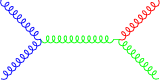

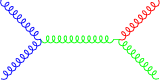

In [6]:
tfd.render("test.pdf")

## Complicated Case

We only set the positions of the Legs here.

In [10]:
fd = FeynmanDiagram().with_rules("* {color: yellow;}")
v1 = Vertex("v1")
v2 = Vertex("v2")
v3 = Vertex("v3")
v4 = Vertex("v4")
p1 = Propagator("p1").connect(v1, v2).set_type("gluon")
p2 = Propagator("p2").connect(v1, v3).set_type("gluon")
p3 = Propagator("p3").connect(v3, v2).set_type("gluon")
p4 = Propagator("p4").connect(v4, v3).set_type("gluon")
p5 = Propagator("p5").connect(v4, v2).set_type("gluon")
l1 = Leg("l1").set_target(v1).set_type("gluon").set_incoming().set_xy(-2, 1)
l2 = Leg("l2").set_target(v1).set_type("gluon").set_incoming().set_xy(-2, -1)
l3 = Leg("l3").set_target(v2).set_type("gluon").set_outgoing().set_xy(2, -2)
l4 = Leg("l4").set_target(v3).set_type("gluon").set_outgoing().set_xy(2, 2)
l5 = Leg("l5").set_target(v4).set_type("gluon").set_outgoing().set_xy(2, 1)
l6 = Leg("l6").set_target(v4).set_type("gluon").set_outgoing().set_xy(2, -1)

fd.propagators.extend([p1, p2, p3, p4, p5])
fd.vertices.extend([v1, v2, v3, v4])
fd.legs.extend([l1, l2, l3, l4, l5, l6])

b''
* {color: yellow;}


Now calculate the positions of vertices.

In [11]:
ffd= feynman_adjust_points(fd)

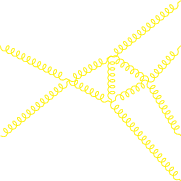

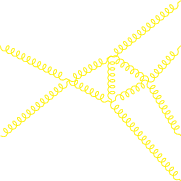

In [12]:
TikzFeynmanRender(ffd).render()